## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing DataFrames

In [2]:
df = pd.read_csv('./cleaned_data/full.csv')
df_old = pd.read_csv('./data/incidents.csv')

/Users/trevorodonnell/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,15,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Dummifying race variable to analyze the correlations between each racial categories and the rest of the varibales in the dataframe, respectively.

In [3]:
df_race_dum = pd.get_dummies(df['Race'], drop_first=False)

Removing the original string-based "Race" column

In [4]:
df = df.drop(columns= ['Race'])

### Concatenating the main dataframe with our dataframe with the dummified race values.

In [5]:
df = pd.concat((df, df_race_dum), axis=1)

### Examining new dataframe

In [6]:
df.head()

,Unique ID,Age,year,month,week_of_year,day_of_month,day_of_week,day_of_year,pop2000,pop2010,...,Agency_police,Agency_sheriff,description,African-American/Black,Asian/Pacific Islander,European-American/White,Hispanic/Latino,Middle Eastern,Native American/Alaskan,Race unspecified
0,1.0,24.0,2000.0,1.0,1.0,2.0,6.0,2.0,1223499.0,1418788,...,1,0,LaTanya Janelle McCoy's car was struck from be...,1,0,0,0,0,0,0
1,2.0,53.0,2000.0,1.0,1.0,2.0,6.0,2.0,665865.0,691893,...,0,1,"Darren Mayfield, a DeKalb County sheriff's dep...",0,0,0,0,0,0,1
2,3.0,23.0,2000.0,1.0,1.0,5.0,2.0,5.0,39678.0,38950,...,1,0,Officer Elias E. Mendiola shot Derrick E. Tate...,0,0,0,0,0,0,1
3,4.0,45.0,2000.0,1.0,1.0,5.0,2.0,5.0,88787.0,101547,...,1,0,John Edward Pittman was shot and killed by off...,1,0,0,0,0,0,0
4,5.0,20.0,2000.0,1.0,1.0,5.0,2.0,5.0,816006.0,920581,...,1,0,"On Jan. 5 around midnight, 20-year-old John Fr...",1,0,0,0,0,0,0


### Correlation by racial categories

#### African American/Black

In [7]:
df.corr()[['African-American/Black']].sort_values(by='African-American/Black', ascending=False, key=np.abs).head(10)

,African-American/Black
African-American/Black,1.000000
pctblack,0.459629
European-American/White,-0.419048
black_2010,0.329365
black_2017,0.326566
black_2019,0.325815
Race unspecified,-0.319256
white_2019,-0.267194
white_2010,-0.250463
pcthispanic,-0.231642


#### Asian/Pacific Islander

In [8]:
df.corr()[['Asian/Pacific Islander']].sort_values(by='Asian/Pacific Islander', ascending=False, key=np.abs).head(10)

,Asian/Pacific Islander
Asian/Pacific Islander,1.000000
pctapi,0.696247
pac_isl_2017,0.273733
pac_isl_2019,0.272965
State_HI,0.270281
two_plus_races_2010,0.229914
two_plus_races_2017,0.208595
two_plus_races_2019,0.208443
asian_2010,0.200429
asian_2017,0.193647


#### European American/White

In [9]:
df.corr()[['European-American/White']].sort_values(by='European-American/White', ascending=False, key=np.abs).head(10)[1:]

,European-American/White
pctwhite,0.427552
Race unspecified,-0.426581
African-American/Black,-0.419048
white_not_hispanic_2010,0.318501
white_not_hispanic_2017,0.316934
white_not_hispanic_2019,0.316206
white_2010,0.304019
Hispanic/Latino,-0.292932
white_2019,0.290714


#### Hispanic/Latino

In [10]:
df.corr()[['Hispanic/Latino']].sort_values(by='Hispanic/Latino', ascending=False, key=np.abs).head(10)[1:]

,Hispanic/Latino
pcthispanic,0.789376
pctwhite,-0.636671
hispanic_2010,0.434743
hispanic_2017,0.432425
hispanic_2019,0.431090
households_speak_spanish_2019,0.411606
foreign_spoken_at_home_2010,0.397057
speak_english_only_2017,-0.390523
households_speak_limited_english_2019,0.339184


#### Middle Eastern

In [11]:
df.corr()[['Middle Eastern']].sort_values(by='Middle Eastern', ascending=False, key=np.abs).head(10)

,Middle Eastern
Middle Eastern,1.000000
pct2prace,0.181870
pctapi,0.083127
rank,0.040982
cum_prop100k,0.037462
building_permits_2010,0.029185
pctwhite,-0.026334
private_nonfarm_employment_2009,0.024196
veterans_2010,0.024099
households_2019,0.023877


#### Native American/Alaskan

In [12]:
df.corr()[['Native American/Alaskan']].sort_values(by='Native American/Alaskan', ascending=False, key=np.abs).head(10)

,Native American/Alaskan
Native American/Alaskan,1.000000
native_2019,0.352717
native_2010,0.351680
pctaian,0.351270
native_2017,0.337318
households_speak_other_2019,0.232984
State_SD,0.170672
metro_2013_Unknown,0.109244
some_college_2016,0.085933
some_college_2017,0.085437


#### Race unspecified

In [13]:
df.corr()[['Race unspecified']].sort_values(by='Race unspecified', ascending=False, key=np.abs).head(60)

,Race unspecified
Race unspecified,1.000000
European-American/White,-0.426581
year,-0.334063
African-American/Black,-0.319256
Hispanic/Latino,-0.223173
Unique ID,-0.195220
Intended use of force (Developing)_Vehic/Purs,0.152495
Intended use of force (Developing)_Suicide,0.130199
Highest level of force_Vehicle,0.121364
State_TX,-0.113270


### Creating dataframe with unique id and state

In [14]:
df_old = df_old[['Unique ID', 'State']]

### Merging unique ids and state dataframe with the rest of the data

In [15]:
df = pd.merge(df, df_old, how = 'left', on = 'Unique ID')

### Examining new dataframe

In [16]:
df.head()

,Unique ID,Age,year,month,week_of_year,day_of_month,day_of_week,day_of_year,pop2000,pop2010,...,Agency_sheriff,description,African-American/Black,Asian/Pacific Islander,European-American/White,Hispanic/Latino,Middle Eastern,Native American/Alaskan,Race unspecified,State
0,1.0,24.0,2000.0,1.0,1.0,2.0,6.0,2.0,1223499.0,1418788,...,0,LaTanya Janelle McCoy's car was struck from be...,1,0,0,0,0,0,0,CA
1,2.0,53.0,2000.0,1.0,1.0,2.0,6.0,2.0,665865.0,691893,...,1,"Darren Mayfield, a DeKalb County sheriff's dep...",0,0,0,0,0,0,1,GA
2,3.0,23.0,2000.0,1.0,1.0,5.0,2.0,5.0,39678.0,38950,...,0,Officer Elias E. Mendiola shot Derrick E. Tate...,0,0,0,0,0,0,1,IL
3,4.0,45.0,2000.0,1.0,1.0,5.0,2.0,5.0,88787.0,101547,...,0,John Edward Pittman was shot and killed by off...,1,0,0,0,0,0,0,AL
4,5.0,20.0,2000.0,1.0,1.0,5.0,2.0,5.0,816006.0,920581,...,0,"On Jan. 5 around midnight, 20-year-old John Fr...",1,0,0,0,0,0,0,GA


### Creating dataframe with data pertaining to observations where race is unspecified

In [17]:
df_unspec = df[df['Race unspecified'] == 1]

### Creating additional dataframe counting observations where race is unspecified, grouped by year 

In [18]:
df_unspec_year = pd.DataFrame(df_unspec.groupby(df_unspec['year'])['Race unspecified'].count())

### Plotting line chart counting observations where race is unspecified by year 

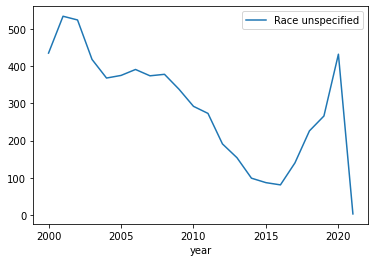

In [19]:
df_unspec_year.plot();

### Creating a dataframe counting observation where race is unspecified, grouped by state

In [20]:
df_unspec_state = pd.DataFrame(df_unspec.groupby(df_unspec['State'])['Race unspecified'].count())

### Examining dataframe 

In [21]:
df_unspec_state

,Race unspecified
State,
AK,31
AL,223
AR,125
AZ,150
CA,958
CO,170
CT,22
DE,15
FL,251


### Creating dataframe counting toatl number of observations, by state

In [22]:
df_total_state = pd.DataFrame(df.groupby(df['State'])['Unique ID'].count())

In [23]:
df_total_state

,Unique ID
State,
AK,81
AL,630
AR,349
AZ,713
CA,4114
CO,567
CT,116
DE,58
FL,1586


### Plotting bar chart with counts of observations with race unspecified grouped by state

<Figure size 720x720 with 0 Axes>

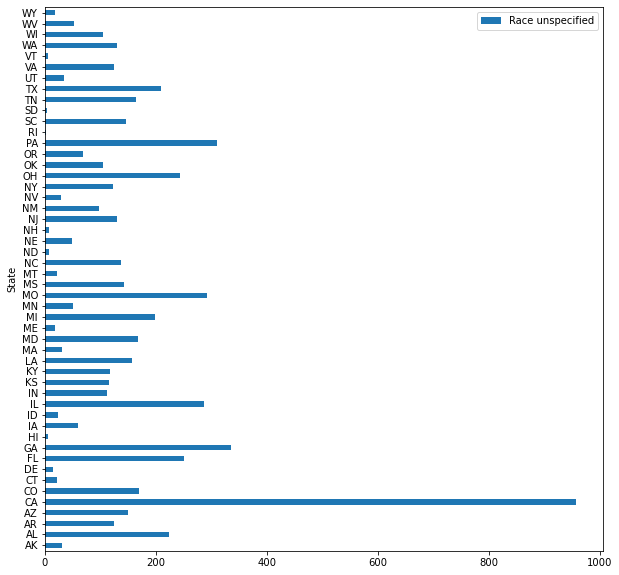

In [24]:
plt.figure(figsize=(10, 10))
df_unspec_state.sort_values(['State']).plot.barh(figsize=(10,10));

### Plotting bar chart with counts of total observations, grouped by state

<Figure size 720x720 with 0 Axes>

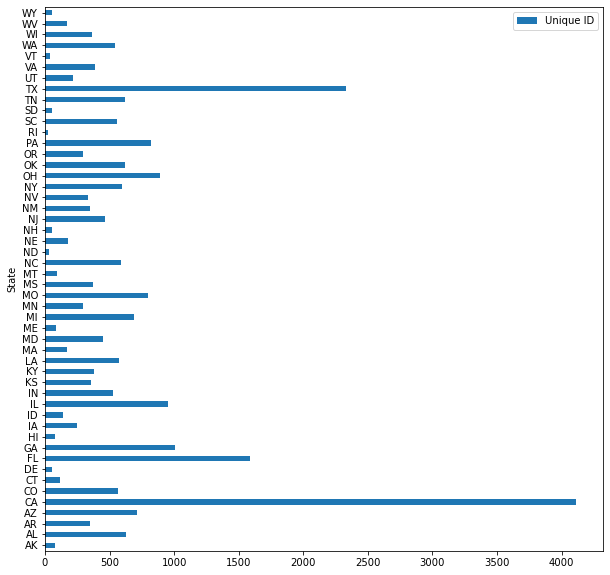

In [25]:
plt.figure(figsize=(10, 10))
df_total_state.sort_values(['State']).plot.barh(figsize=(10,10)); 

### Creating dataframe counting observations where race is unspecified as well as where race is specified.

In [26]:
df_unspec_year = pd.DataFrame(df.groupby(['year','Race unspecified'])['Unique ID'].count())

### Examining dataframe

In [27]:
df_unspec_year

Unique ID
year   Race unspecified           
2000.0 0                       294
       1                       435
2001.0 0                       259
       1                       534
2002.0 0                       331
       1                       524
2003.0 0                       510
       1                       418
2004.0 0                       527
       1                       368
2005.0 0                       653
       1                       375
2006.0 0                       694
       1                       391
2007.0 0                       717
       1                       374
2008.0 0                       671
       1                       378
2009.0 0                       739
       1                       338
2010.0 0                       830
       1                       292
2011.0 0                       970
       1                       273
2012.0 0                      1102
       1                       191
2013.0 0                      1392
       1                       154
2014.0 0                      1414
       1                        99
2015.0 0                      1333
       1                        87
2016.0 0                      1321
       1                        81
2017.0 0                      1368
       1                       140
2018.0 0                      1347
       1                       226
2019.0 0                      1260
       1                       266
2020.0 0                      1167
       1                       432
2021.0 0                       729
       1                         3